In [183]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pipeline import *
from utils import *


df1C = pd.read_csv("./A2390C/centroid_analysis_A2390C_aper_all.csv")
df1C.ID = df1C.ID.astype("str")+"C"
df1E = pd.read_csv("./A2390SE/centroid_analysis_A2390SE_aper_all.csv")
df1E.ID = df1E.ID.astype("str")+"E"
df1W = pd.read_csv("./A2390NW/centroid_analysis_A2390NW_aper_all.csv")
df1W.ID = df1W.ID.astype("str")+"W"

Tab = pd.merge(df1E, df1W, how="outer")
Tab = pd.merge(df1C, Tab, how="outer")
# df2 = pd.read_csv("./A2465C/centroid_analysis_A2465C_aper.csv")
# Tab = pd.concat([df1, df1E, df1W, df2])

Tab_c = Tab[Tab.type=='c']
Tab_v = Tab[Tab.type=='v']

diff_centroid_v_all = Tab_v.diff_centroid
diff_centroid_c_all = Tab_c.diff_centroid
diff_angle_v_all = Tab_v.diff_angle
diff_angle_c_all = Tab_c.diff_angle

In [ ]:
# Clean control smaple
match_c1 = np.array([],dtype="int64")
match_c2 = np.array([],dtype="int64")
for i in Tab_c.index[:len(Tab_c)//2+1]:
    Coords_c = SkyCoord(Tab_c.drop([i]).ra, Tab_c.drop([i]).dec, frame='icrs', unit="deg")
    c = SkyCoord(Tab_c.ra[i], Tab_c.dec[i], frame='icrs', unit="deg")
    # Match two catalogs
    idx, d2d, d3d = c.match_to_catalog_sky(Coords_c)
    
    if d2d < 1 * u.arcsec:
        print("Obj:%d  Matched:%d"%(i, idx+1))
        match_c1 = np.append(match_c1, i)
        match_c2 = np.append(match_c2, idx+1)
        
Tab_mc = Tab_c.copy()
for m1, m2 in zip(match_c1, match_c2):
    m = m1 if Tab_c.dist_edge[m1]<Tab_c.dist_edge[m2] else m2
    Tab_mc = Tab_mc.drop(m)
Tab_mc

In [190]:
Tab_v = Tab_v.reset_index(drop=True)
Tab_c = Tab_c.reset_index(drop=True)
Tab_v

,ID,ra,dec,redshift,SNR_Ha,SNR_Hb,dist_edge,diff_angle,diff_centroid,type
0,14C,328.437389,17.579927,0.249999,22.872031,16.610540,8.027268,61.985779,0.568686,v
1,34C,328.396718,17.580286,0.247190,9.448132,12.643702,20.008673,132.033827,0.639191,v
2,100C,328.431868,17.587243,0.254723,3.733020,6.373497,94.148430,95.658788,0.062862,v
3,114C,328.485076,17.590044,0.234502,5.588553,5.887732,59.486350,5.788615,0.567589,v
4,167C,328.437613,17.595225,0.242466,6.312940,9.276380,184.529109,126.716526,0.294416,v
5,224C,328.329826,17.598383,0.240483,5.442454,5.617711,199.965087,31.559951,0.027268,v
6,227C,328.422475,17.598558,0.256343,5.990316,6.246249,225.876701,34.640359,0.364702,v
7,267C,328.309657,17.602222,0.255119,5.049703,6.283411,46.603353,17.072989,0.428321,v
8,285C,328.393655,17.607061,0.249965,35.102876,12.207967,137.691339,46.879277,0.333120,v
9,313C,328.332677,17.607293,0.244811,5.324293,5.537594,180.118525,144.557199,0.221128,v


In [185]:
match_1 = np.array([],dtype="int64")
match_2 = np.array([],dtype="int64")
for i in Tab_v.index[:len(Tab_v)//2+1]:
#     Coords_v = SkyCoord(Tab_v.drop([i]).ra, Tab_v.drop([i]).dec, frame='icrs', unit="deg")
    Coords_v = SkyCoord(Tab_v.drop([i]).ra, Tab_v.drop([i]).dec, frame='icrs', unit="deg")
    c = SkyCoord(Tab_v.ra[i], Tab_v.dec[i], frame='icrs', unit="deg")
    # Match two catalogs
    idx, d2d, d3d = c.match_to_catalog_sky(Coords_v)
    
    if d2d < 2 * u.arcsec:
        print("Obj:%d  Matched:%d"%(i, idx+1))
        match_1 = np.append(match_1, i)
        match_2 = np.append(match_2, idx+1)
#     plt.hist(d2d.to(u.arcsec).value, range=[0,1])

Obj:0  Matched:161
Obj:4  Matched:155
Obj:10  Matched:151
Obj:15  Matched:176
Obj:44  Matched:191
Obj:47  Matched:189
Obj:58  Matched:182
Obj:59  Matched:181
Obj:60  Matched:185
Obj:102  Matched:187


In [186]:
print(Tab_v.iloc[0])
print(Tab_v.iloc[161])

ID                    14C
ra                328.437
dec               17.5799
redshift         0.249999
SNR_Ha             22.872
SNR_Hb            16.6105
dist_edge         8.02727
diff_angle        61.9858
diff_centroid    0.568686
type                    v
Name: 0, dtype: object
ID                  1602E
ra                328.437
dec               17.5797
redshift         0.250401
SNR_Ha            27.9225
SNR_Hb            19.3354
dist_edge         319.411
diff_angle        60.5577
diff_centroid    0.180601
type                    v
Name: 161, dtype: object


In [187]:
print(Tab_v.iloc[44])
print(Tab_v.iloc[191])

ID                  1212C
ra                328.361
dec               17.7589
redshift         0.246793
SNR_Ha            14.9519
SNR_Hb            12.7782
dist_edge         24.7305
diff_angle        16.3815
diff_centroid    0.726675
type                    v
Name: 44, dtype: object
ID                   288W
ra                328.361
dec               17.7587
redshift         0.246826
SNR_Ha            8.38816
SNR_Hb            8.81253
dist_edge         176.168
diff_angle        156.129
diff_centroid    0.819881
type                    v
Name: 191, dtype: object


0
155
151
176
191
189
182
181
185
187


,ID,ra,dec,redshift,SNR_Ha,SNR_Hb,dist_edge,diff_angle,diff_centroid,type
3,114C,328.485076,17.590044,0.234502,5.588553,5.887732,59.486350,5.788615,0.567589,v
10,325C,328.413625,17.609707,0.230934,20.716203,18.137256,223.391717,119.363405,0.935828,v
13,375C,328.458421,17.617898,0.225814,12.965420,10.640715,208.210774,7.490028,0.285388,v
15,397C,328.454840,17.622009,0.226210,25.541735,9.151123,221.211496,17.601123,0.254587,v
16,463C,328.392651,17.622805,0.224590,9.812738,5.632056,311.884703,68.067424,0.239635,v
20,583C,328.311578,17.634871,0.226210,53.562631,7.549273,77.440611,78.082984,0.039189,v
22,600C,328.479545,17.637149,0.229382,16.843756,5.102323,109.451893,110.941032,0.154785,v
24,633C,328.452914,17.639550,0.229348,8.862522,7.741285,244.911506,177.232576,0.542675,v
25,646C,328.367534,17.638939,0.237708,20.375058,17.676577,369.221250,149.102026,0.170687,v
27,684C,328.308873,17.640930,0.218677,8.223353,3.319556,49.369951,80.454407,0.319752,v


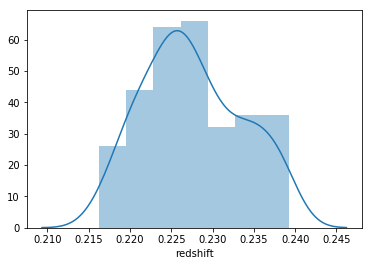

In [351]:
# Delete repeated detections with smaller S/N
Tab_m = Tab_v.copy()
for m1, m2 in zip(match_1, match_2):
    m = m1 if Tab_v.SNR_Ha[m1]<Tab_v.SNR_Ha[m2] else m2
    print(m)
    Tab_m = Tab_m.drop(m)
Tab_m = Tab_m[abs(Tab_m.redshift-0.228)<0.012]
sns.distplot(Tab_m.redshift)
Tab_m

In [352]:
Tab_ma = Tab_m[(Tab_m.SNR_Ha>Tab_m.SNR_Hb)]

d_centroid_v = Tab_ma.diff_centroid
d_centroid_c = Tab_mc.diff_centroid
d_angle_v = Tab_ma.diff_angle
d_angle_c = Tab_mc.diff_angle

## APER A2390C + A2390E + A2390W

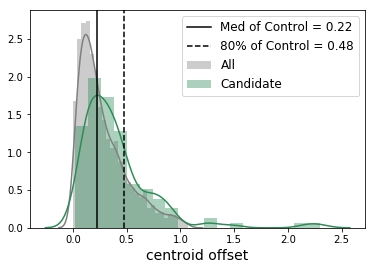

In [353]:
draw_centroid_offset(d_centroid_v, d_centroid_c,crit=[0.5,0.8])

# of offset > 50% : 90
# of offset > 80% : 35


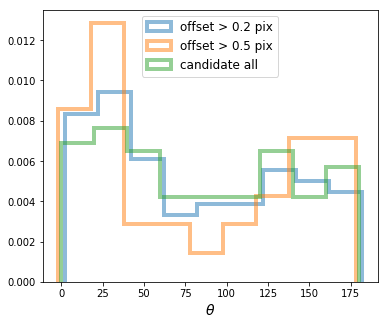

In [354]:
# APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[0.5, 0.8], b=10)

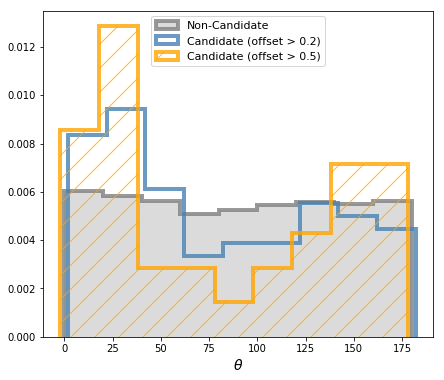

In [355]:
# Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[0.5,0.8], b=10)

In [356]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# APER A2390C + A2390E + A2390W
p = np.percentile(d_centroid_c, 50)
q = np.percentile(d_centroid_c, 80)

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.0274
K-S: p-value=0.0686
Anderson_ksampResult(statistic=2.0020585840342795, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.048006674585053706)
Anderson_ksampResult(statistic=0.9307158241096387, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.13514088669909244)


## APER A2390C + A2390E + A2390W + A2465C

In [357]:
# Merge A2465
df2 = pd.read_csv("./A2465C/centroid_analysis_A2465C_aper_all.csv")
df2.ID = df2.ID.astype("str")+"D"
Tab_v_2 = df2[(df2.type=='v')]
Tab_m_2 = pd.merge(Tab_ma, Tab_v_2[(abs(Tab_v_2.redshift-0.245)<0.012)], how="outer")
Tab_c_2 = pd.merge(Tab_mc, df2[(df2.type=='c')], how="outer")

d_centroid_v = Tab_m_2.diff_centroid
d_centroid_c = Tab_c_2.diff_centroid
d_angle_v = Tab_m_2.diff_angle
d_angle_c = Tab_c_2.diff_angle

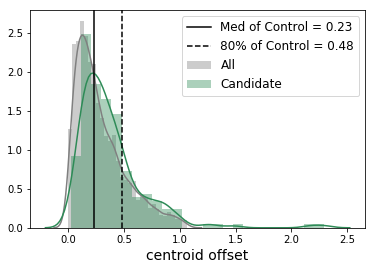

In [358]:
draw_centroid_offset(d_centroid_v, d_centroid_c,crit=[0.5,0.8])

# of offset > 50% : 150
# of offset > 80% : 54


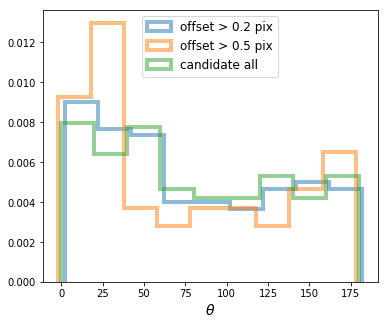

In [375]:
# APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[0.5, 0.8], b=10)

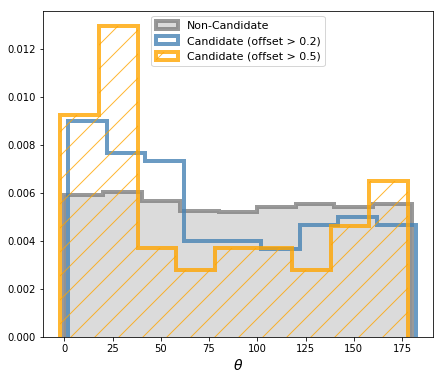

In [376]:
# Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[0.5,0.8], b=10)

In [380]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# APER A2390C + A2390E + A2390W + A2465C
p = np.percentile(d_centroid_c, 50)
q = np.percentile(d_centroid_c, 80)

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.0038
K-S: p-value=0.0071
Anderson_ksampResult(statistic=3.943237683343263, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.008533287656420242)
Anderson_ksampResult(statistic=2.6001366637664365, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.027627697563615446)


In [381]:
Tab_m_2

,ID,ra,dec,redshift,SNR_Ha,SNR_Hb,dist_edge,diff_angle,diff_centroid,type
0,325C,328.413625,17.609707,0.230934,20.716203,18.137256,223.391717,119.363405,0.935828,v
1,375C,328.458421,17.617898,0.225814,12.965420,10.640715,208.210774,7.490028,0.285388,v
2,397C,328.454840,17.622009,0.226210,25.541735,9.151123,221.211496,17.601123,0.254587,v
3,463C,328.392651,17.622805,0.224590,9.812738,5.632056,311.884703,68.067424,0.239635,v
4,583C,328.311578,17.634871,0.226210,53.562631,7.549273,77.440611,78.082984,0.039189,v
5,600C,328.479545,17.637149,0.229382,16.843756,5.102323,109.451893,110.941032,0.154785,v
6,633C,328.452914,17.639550,0.229348,8.862522,7.741285,244.911506,177.232576,0.542675,v
7,646C,328.367534,17.638939,0.237708,20.375058,17.676577,369.221250,149.102026,0.170687,v
8,684C,328.308873,17.640930,0.218677,8.223353,3.319556,49.369951,80.454407,0.319752,v
9,738C,328.382686,17.645228,0.216264,12.595511,3.510778,422.011537,154.607308,0.886890,v
